In [46]:
%matplotlib inline
from sklearn import svm
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat

from sklearn.model_selection import train_test_split
import pandas as pd

In [82]:
mat = loadmat('ex6data1.mat')

data = pd.DataFrame(mat['X'], columns=['X1', 'X2'])
data['y'] = mat['y']
svc = svm.LinearSVC(C=1, loss='hinge', max_iter=1000)

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3)

<Figure size 432x288 with 0 Axes>

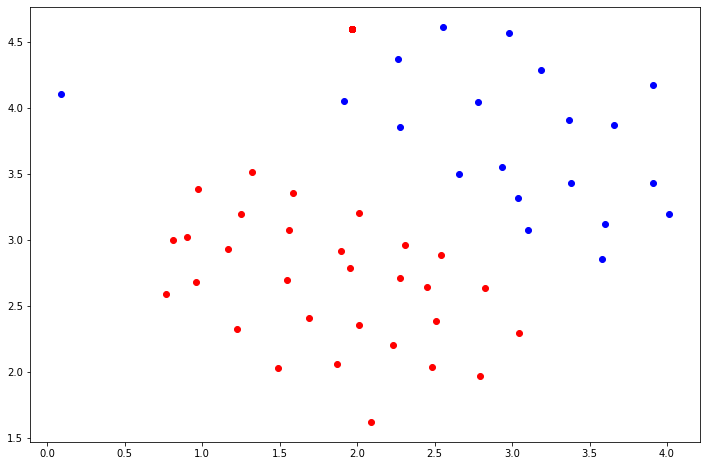

In [87]:
def plot_data(X, y):
    pos = np.nonzero(y == 1)
    neg = np.nonzero(y == 0)
    plt.plot(X[pos, 0], X[pos, 1], linestyle='', marker='o', color='b')
    plt.plot(X[neg, 0], X[neg, 1], linestyle='', marker='o', color='r')
    
plt.figure()
plt.subplots(figsize=(12,8))
plot_data(mat['X'], mat['y'])
plt.show()

score: 0.9803921568627451


<Figure size 432x288 with 0 Axes>

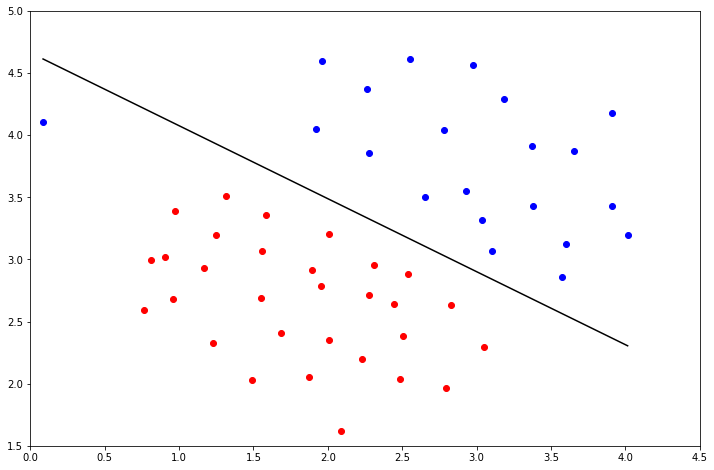

In [80]:
def visualize_boundary_linear(X, y, clf):
    plot_data(X, y)

    coef = clf.coef_.ravel()
    intercept = clf.intercept_.ravel()

    xp = np.linspace(np.min(X[:, 0]), np.max(X[:, 0]), 100)
    yp = -1.0 * (coef[0] * xp + intercept[0]) / coef[1]

    plt.plot(xp, yp, linestyle='-', color='k')

data = loadmat('ex6data1.mat')
X = data['X']
y = data['y'].reshape(-1)

clf = svm.LinearSVC(C=1)
clf.fit(X, y)

plt.figure()
plt.subplots(figsize=(12,8))
visualize_boundary_linear(X, y, clf)
plt.xlim([0, 4.5])
plt.ylim([1.5, 5])
plt.show()

In [78]:
svc = svm.SVC()
svc.fit(X, y)
print('Training accuracy = {0}%'.format(np.round(svc.score(X, y) * 100, 2)))
print('Test accuracy = {0}%'.format(np.round(svc.score(X_test, y_test) * 100, 2)))

Training accuracy = 100.0%
Test accuracy = 100.0%


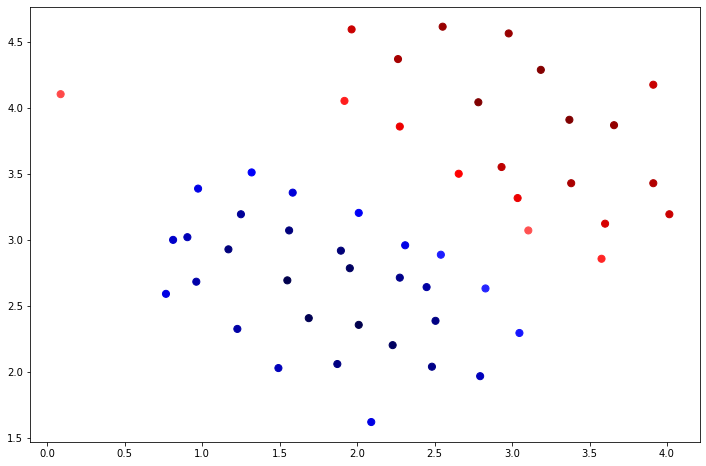

In [55]:
data['SVM 1 Confidence'] = svc.decision_function(data[['X1', 'X2']])

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(data['X1'], data['X2'], s=50, c=data['SVM 1 Confidence'], cmap='seismic')